Group project

Start with some imports. 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

-----

## Part 1 - Prediction challenge

Start by importing the data

In [33]:
#importing the dataset
dataset = pd.read_csv('listings_CPH.csv')


Take a look at the dataset

In [34]:
#take a look at the dataset
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,2022-06-21,1.08,1,0,4,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,2022-08-09,0.55,1,303,8,NaN
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,NaN,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2022-09-10,2.06,3,56,7,NaN
3,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,2022-08-04,0.16,1,59,2,NaN
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022-08-22,0.13,1,0,2,NaN


We want to predict weather the price is low so we start by defining what is a low price
We decide that a low price is a price that is lower than the median price of housing

In [35]:
#define a low price threshold
#we will use the median price as the threshold for low price
low_price_threshold = dataset['price'].median()
#this means low price is lower than the median price

want to see how many listings are more expensive and how many listings are less expensive than the median benchmark

In [36]:
#check how many listings are below the threshold
low_price = dataset[dataset['price'] < low_price_threshold]
print('There are {} listings below the threshold'.format(len(low_price)))
#check how many listings are above the threshold
high_price = dataset[dataset['price'] > low_price_threshold]
print('There are {} listings above the threshold'.format(len(high_price)))

There are 6899 listings below the threshold
There are 6845 listings above the threshold


We see that the dataset is pretty evenly split

Now we want to predict weather the price will be low or high

In [37]:
#prepare the dataset for classification
#we will use the price as the target variable
#we will use the number of bedrooms, bathrooms, beds, and guests as the features

#step 1: create a new column called 'low_price'
#step 2: assign 1 to the low price and 0 to the high price
dataset['low_price'] = np.where(dataset['price'] < low_price_threshold, 1, 0)



Now we create the model

In [38]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(max_iter=100000)

Now we have a empty model
Start by creating a test set with (2/3) of the data and training set with the remaining (1/3)

In [39]:
#create the training and testing sets
#we will use 2/3 of the data for training and 1/3 for testing
split = int(len(dataset)*2/3)
train = dataset[:split]
test = dataset[split:]

Now we want to pick the x and y for the sets.
Y is the stress variable in this case and x are almost all other columns
start by taking a look at the other columns

In [40]:
train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'low_price'],
      dtype='object')

Make the x- and x/y_train,y/y_test

In [147]:
x_train = train[['latitude', 'longitude',
       'minimum_nights', 'number_of_reviews','neighbourhood',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']]
x_test = test[['latitude', 'longitude',
       'minimum_nights', 'number_of_reviews','neighbourhood',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']]

y_train = train['low_price']

y_test=test['low_price']

In [148]:
x_train[:5].T

,0,1,2,3,4
latitude,55.68641,55.69307,55.67602,55.67023,55.666602
longitude,12.54741,12.57649,12.5754,12.55504,12.555283
minimum_nights,3,4,3,7,3
number_of_reviews,172,59,300,24,19
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave
reviews_per_month,1.08,0.55,2.06,0.16,0.13
calculated_host_listings_count,1,1,3,1,1
availability_365,0,303,56,59,0
number_of_reviews_ltm,4,8,7,2,2


In [149]:
y_train = train['low_price']

y_test = test['low_price']

In [150]:
#remove nan values
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)
#use logistic regression to train the model
LogReg.fit(x_train, y_train)

ValueError: could not convert string to float: 'Nrrebro'

Check the accuracy of the model

In [ ]:
print(LogReg.score(x_test,y_test))
print(LogReg.score(x_train, y_train))

0.5704668838219327
0.6066232356134637


Since both values are close the model is most likely not overfitting

Next we want to check the confusion matrix

In [ ]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = LogReg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1351 1132]
 [ 846 1276]]


Make a more graphical verison

/Users/smaristeinn/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


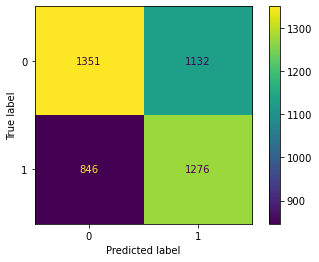

In [ ]:
#visualize the confusion matrix
plot_confusion_matrix(LogReg, x_test, y_test) 

In [ ]:
#calculate the f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5633554083885209

In [ ]:
#improve the model
